Alright!

This will be a first attempt at data exploration using the Kaggle House Prices (Advanced Regression) dataset.

Thanks to Pedro Marcelino ([link](https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook)) for the inspiration and guidance. 

His analysis is based largely on Hair et al. (2013) ([Examining your data](https://www.amazon.com/gp/product/9332536503/ref=as_li_tl?ie=UTF8&camp=1789&creative=9325&creativeASIN=9332536503&linkCode=as2&tag=pmarcelino0b-20&linkId=ab279fb29582571ebfa89e6e8b95c50a)), which provides a great comprehesive approach to data cleansing:

1.  Understand the problem
2.  Univaraible study (focus on dependent variable)
3.  Multivariate study 
3.  Basic cleaning (handle missing data, outliers and categorical variables)
5.  Test assumptions (there are numerous assumptions required by most multivariate techniques)
    - Normality (data should look like a normal distribution)
    - Homoscedasticity (dependent varaible(s) exhibit equal levels of variance across a range of predictor variables)
    - Linearity (if patterns are not linear, it would be worthwhile to explore data transformations)
    - Absence of correlated errors 

Starting off, we want to import all the relevant libraries:

In [1]:
import pandas as pd                                 # Python library for handling structured data
from pathlib import Path                            # Clean way to work with file and folder paths
import matplotlib.pyplot as plt                     # Loads matplotlib's pypolot module for plotting graphs
import seaborn as sns                               # Statistically plotting library built on top of Matplotlib
import numpy as np                                  # Fundamental library for arrays and numerical operations
from scipy.stats import norm                        # Normal distribution object from SciPy's stats module
from sklearn.preprocessing import StandardScaler    # Tool to standardise data from scikitlearn
from scipy import stats                             # Loads stats function (e.g. t-tests, correlations, distributions)
import statsmodels.api as sm                        # Statistical models, including linear regression
%matplotlib inline
# ^^ Makes Matplotlib plots appear inside the notebook (can zoom) ^^
%config InlineBackend.figure_format = 'retina'
# ^^ Makes plots look better on high-res screens ^^


pd.set_option('display.max_columns', None)  # Show all columns when displaying a dataframe



# Step 1: Visualising our data

Now, we want to import our data into the notebook and make it easily accessible by labelling it using pandas

We then want to print out the shape of the training (and test) sets, and have a taster for what the first 5 rows look like

In [2]:
data_raw = Path("..") / "data" / "raw"
train = pd.read_csv(data_raw / "train.csv")
test = pd.read_csv(data_raw / "test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)

train.head(5)          # Shows the first 5 rows of the training set

Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Now let's have a look at the variables:

In [3]:
list(train.columns)


['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

Now, lets have a look at the descriptive statistics for our output variable, 'SalePrice'

In [4]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Count'>

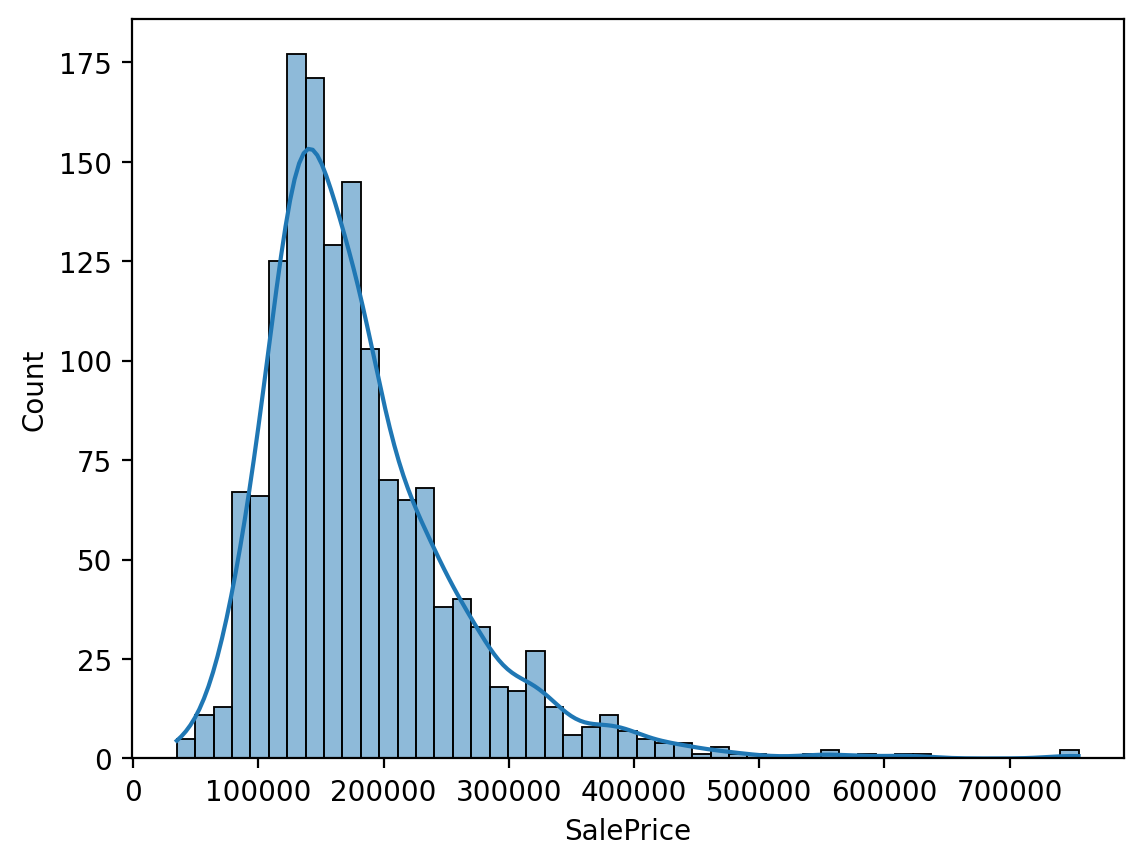

In [5]:
sns.histplot(train['SalePrice'], kde=True)

In [6]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


<u>For context:</u>

Skewness rule of thumb:  
	•	0 → symmetric (normal)  
	•	Between -0.5 and +0.5 → fairly symmetric  
	•	Between ±0.5 and ±1 → moderately skewed  
	•	Beyond ±1 → highly skewed  


Kurtosis rule of thumb:  
	•	Highter than 3 = leptokurtic (sharp peak, heavy tails, more outliers)  
	•	Lower than 3 = platykurtic (flatter, light tails)  

Great! Now that we have had a look at SalesPrice, we can start to investigate its relationship with some numerical variables of interest

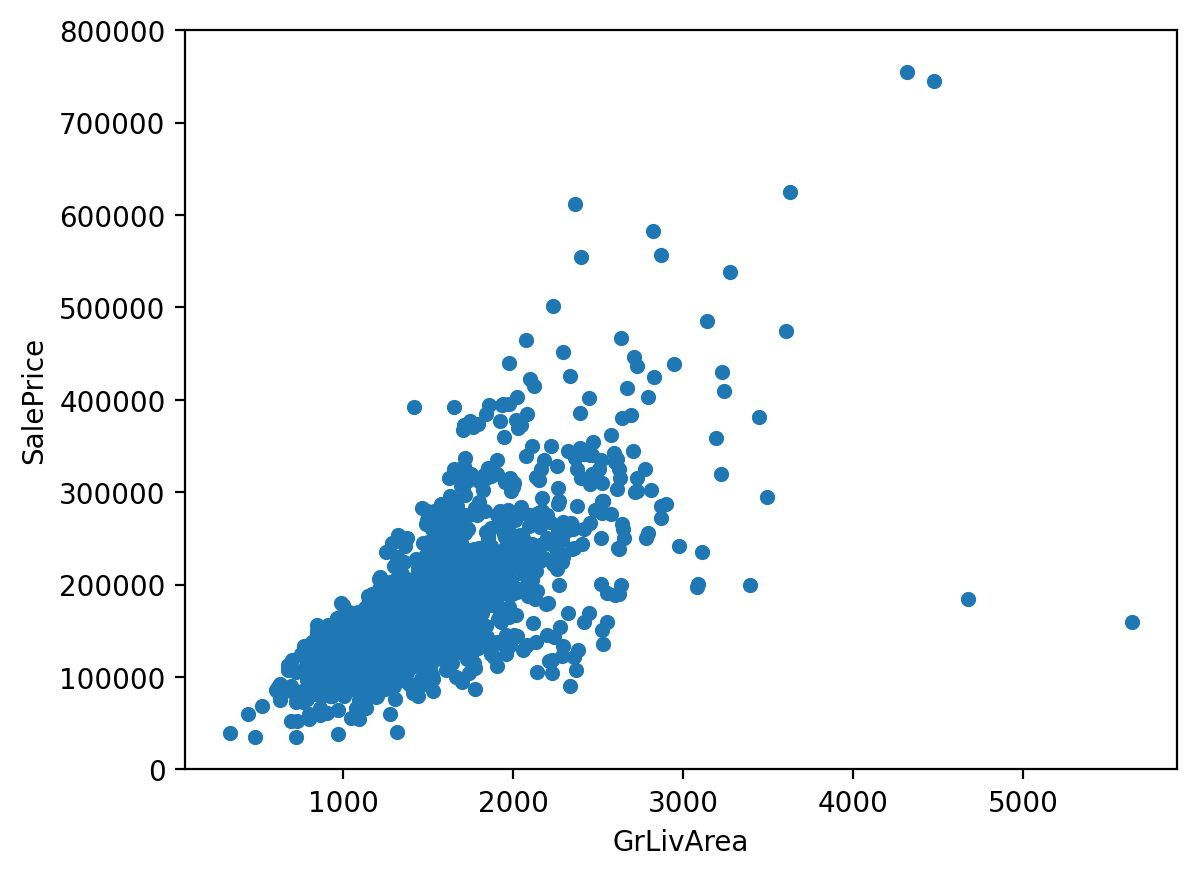

In [7]:
#scatter plot grlivarea/saleprice

data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)  # Concatenate the two columns into a new DataFrame. axis=1 means we are concatenating columns (not rows)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));   # Scatter plot with GrLivArea on the x-axis and SalePrice on the y-axis. ylim sets the y-axis limits

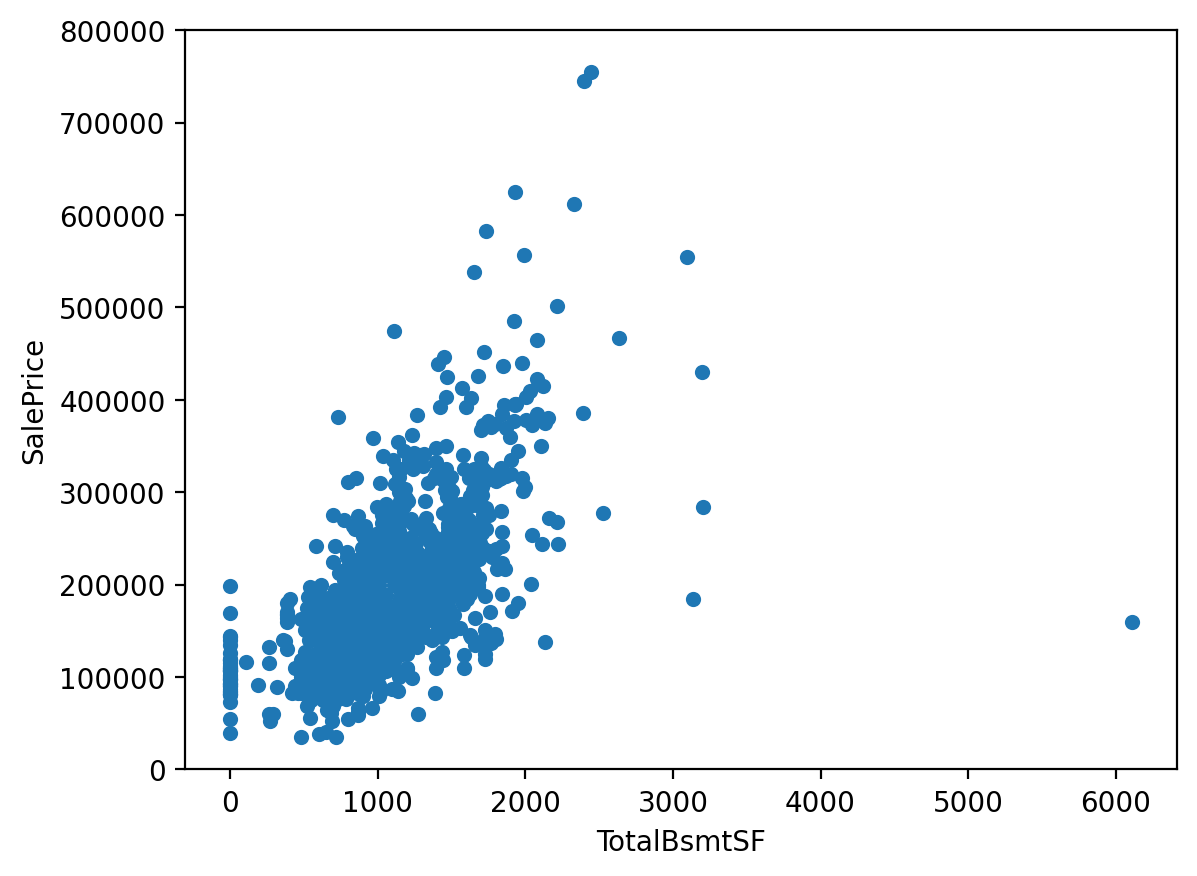

In [8]:
data =pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis=1)  # Concatenate the two columns into a new DataFrame. axis=1 means we are concatenating columns (not rows)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));   # Scatter plot with GrLivArea on the x-axis and SalePrice on the y-axis. ylim sets the y-axis limits

Note: Clearly there are a few instances of TotalBsmtSF = 0

Now, lets look at the relationship between SalePrice and some categorical features

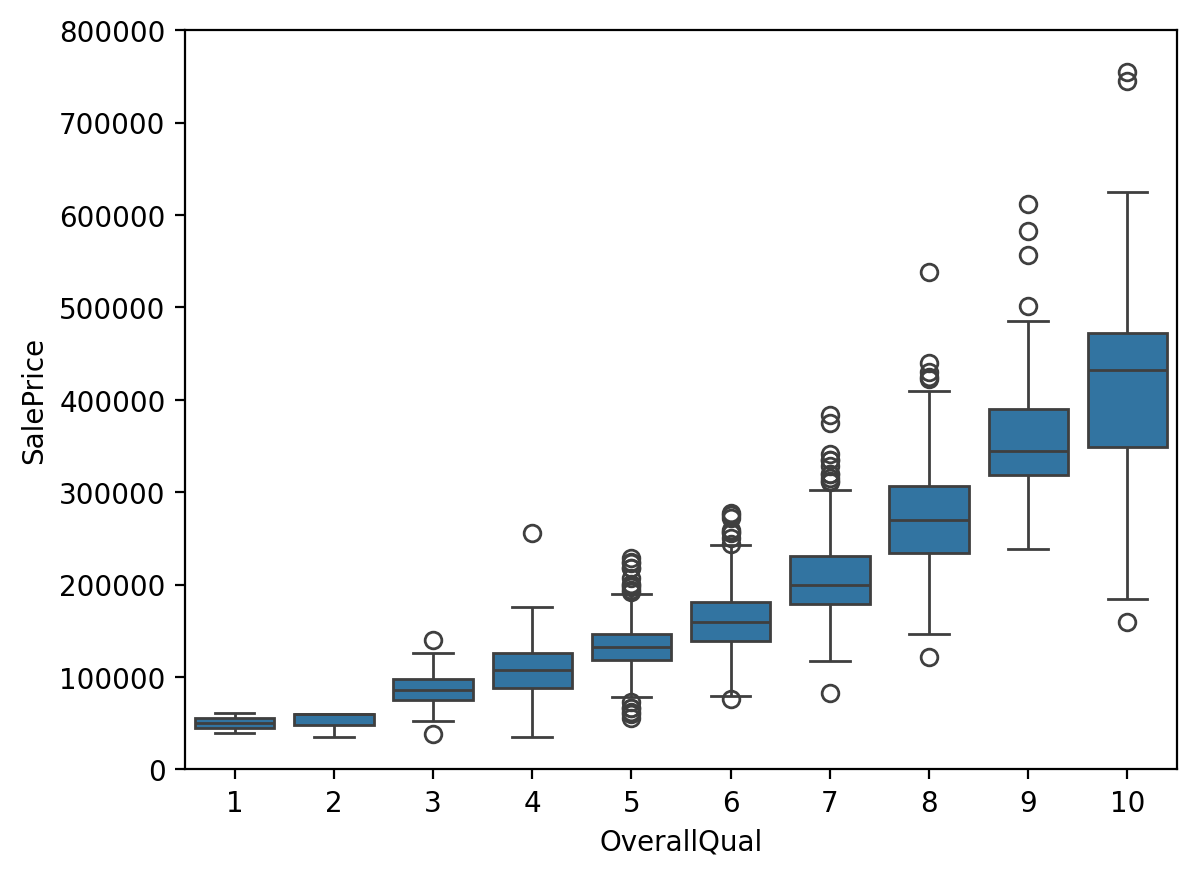

In [9]:
#boxplot overallqual/saleprice

data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)  # Concatenate the two columns into a new DataFrame. axis=1 means we are concatenating columns (not rows)
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)  # Create a boxplot with OverallQual on the x-axis and SalePrice on the y-axis
fig.axis(ymin=0, ymax=800000);                                    # Set the y-axis limits



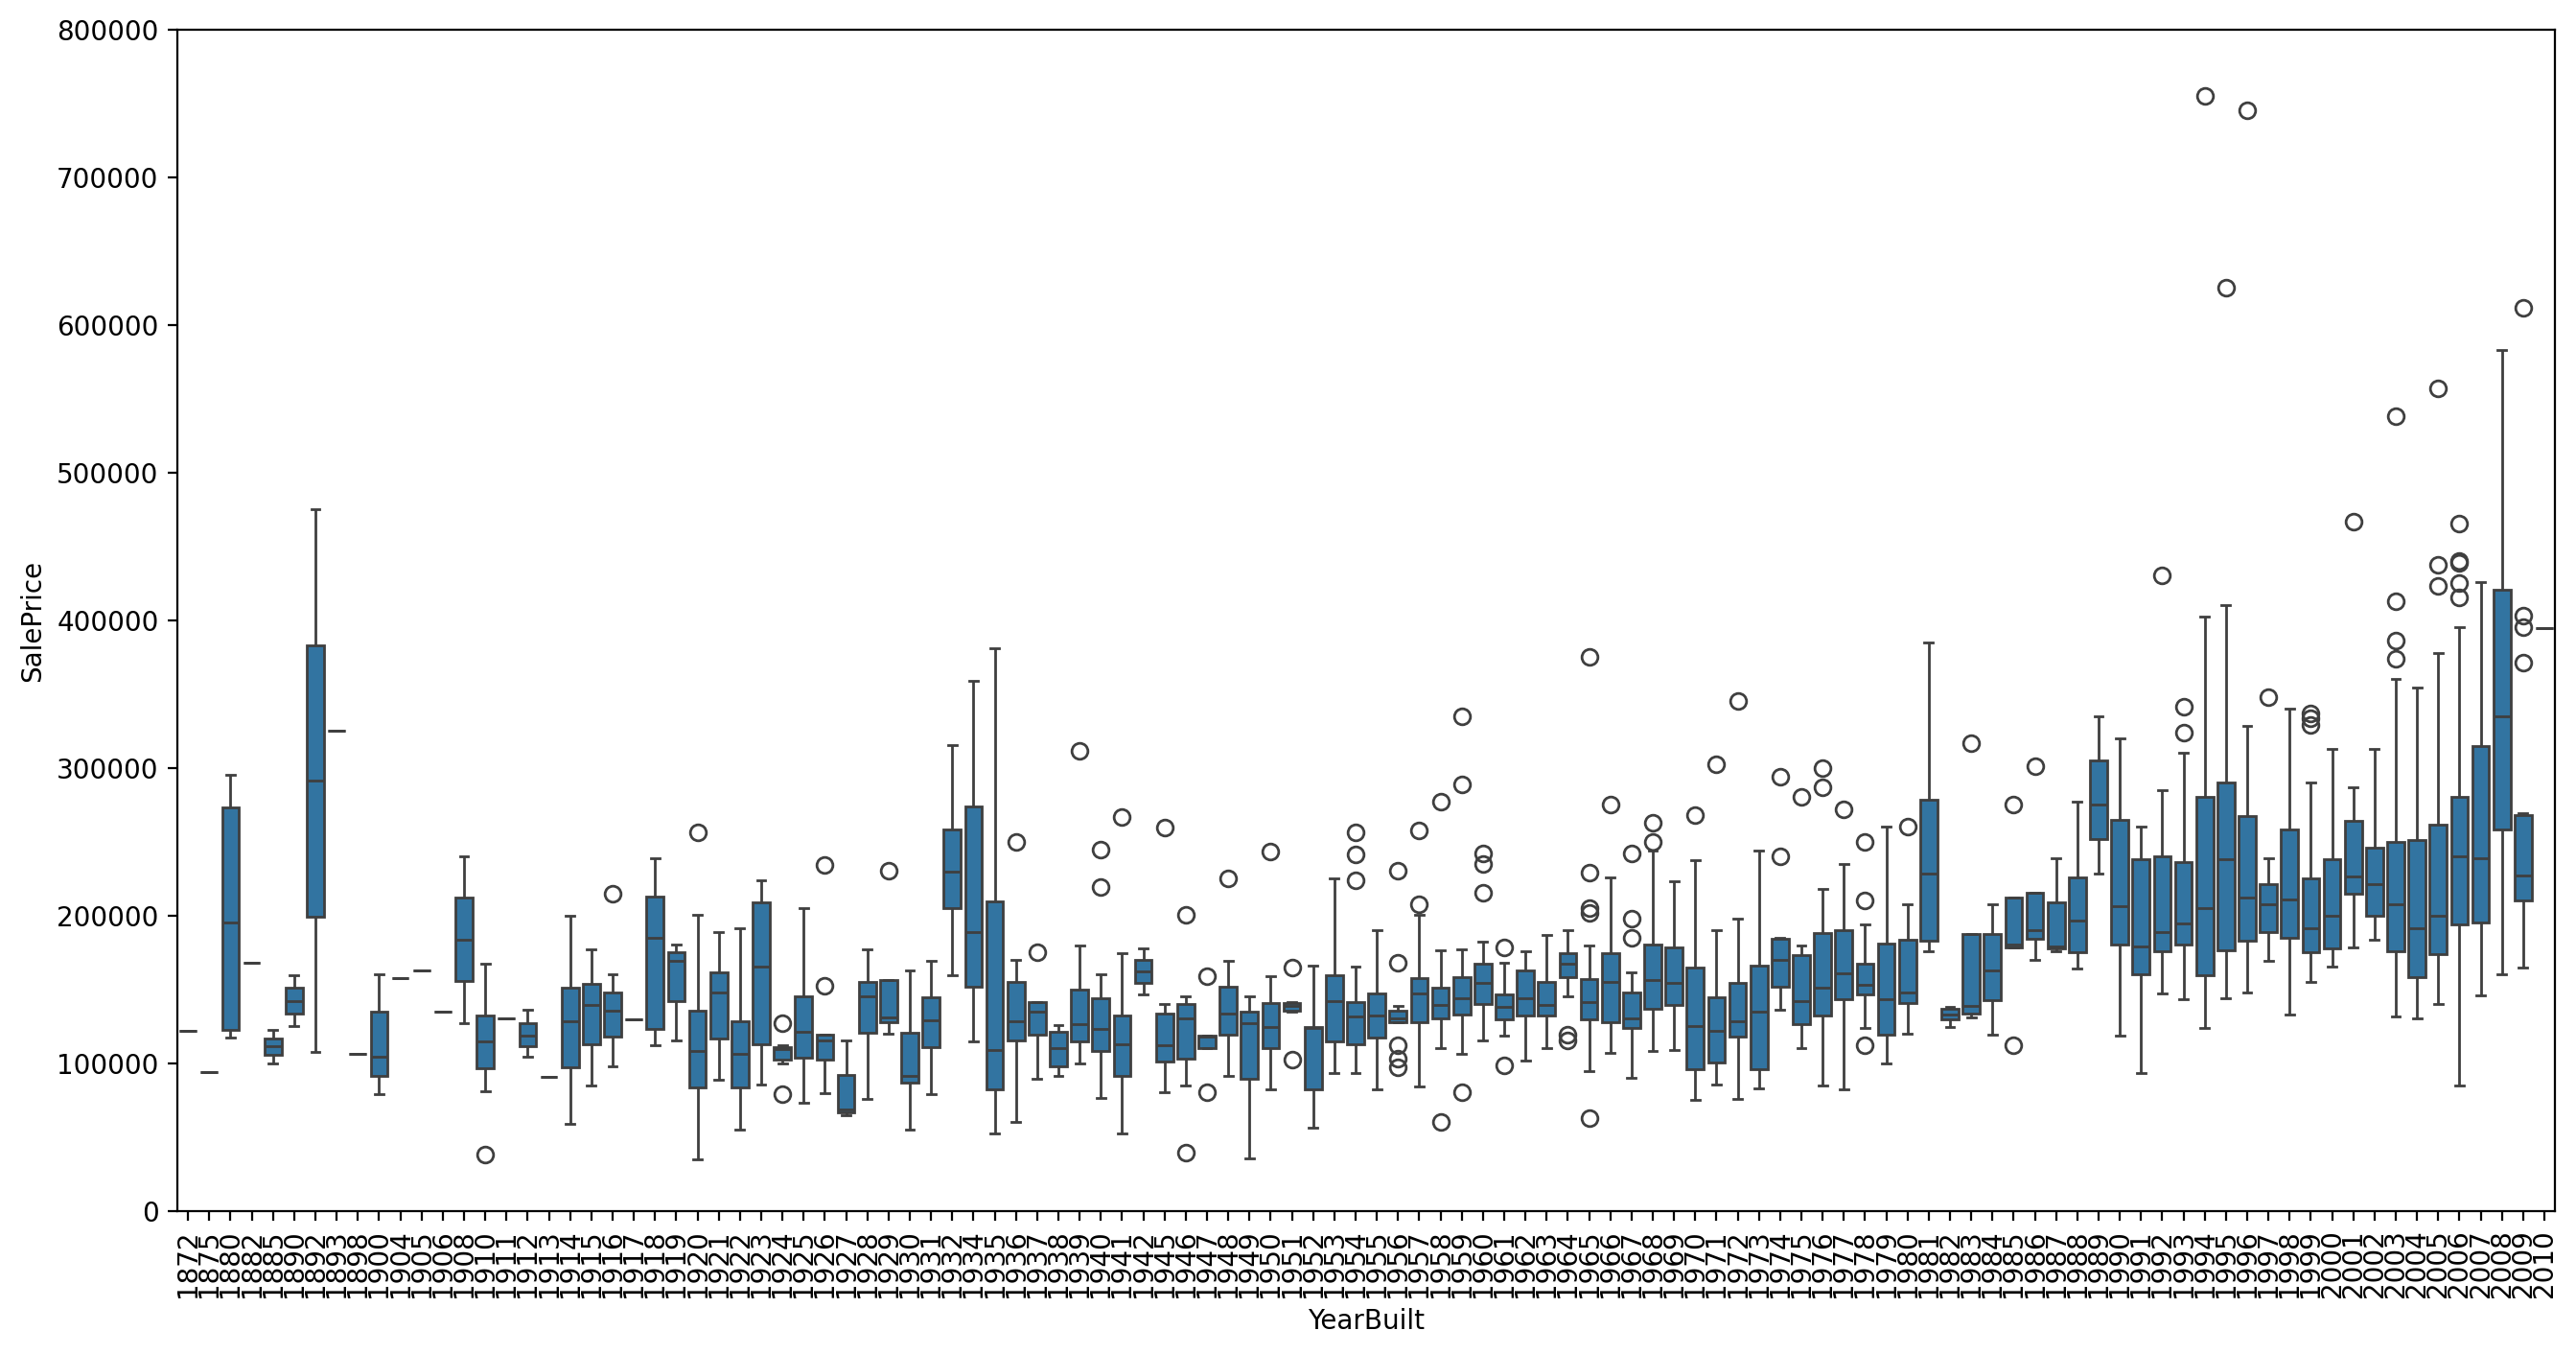

In [10]:
data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

We are already starting to observe some very interesting relationships, but we have been selective in choosing which variables to work with.

#### Now, lets move onto the **'Plasma Soup'**, where we look at the relationships between **all** variables

To explore the universe of data we have, lets use the following methods:

- Correlation matrix (heatmaps style)
- 'SalePrice' correlation matrix (zoomed heatmap style)
- Scatter plots between the most correlated variables

In [11]:
##First we need to filter out all non-numerical variables
numeric_train = train.select_dtypes(include=[np.number])  # Select only numerical features

## Then we want to print the columns we are keeping, and those we are dropping
print("Numerical features:")
for col in numeric_train.columns:
    print("-", col)

dropped_features = set(train.columns) - set(numeric_train.columns)
print("\nDropped (categorical) features:")
for col in dropped_features:
    print("-", col)

Numerical features:
- Id
- MSSubClass
- LotFrontage
- LotArea
- OverallQual
- OverallCond
- YearBuilt
- YearRemodAdd
- MasVnrArea
- BsmtFinSF1
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- LowQualFinSF
- GrLivArea
- BsmtFullBath
- BsmtHalfBath
- FullBath
- HalfBath
- BedroomAbvGr
- KitchenAbvGr
- TotRmsAbvGrd
- Fireplaces
- GarageYrBlt
- GarageCars
- GarageArea
- WoodDeckSF
- OpenPorchSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal
- MoSold
- YrSold
- SalePrice

Dropped (categorical) features:
- MiscFeature
- BldgType
- LotShape
- CentralAir
- HouseStyle
- GarageType
- Utilities
- Exterior1st
- GarageFinish
- BsmtQual
- Foundation
- GarageCond
- RoofStyle
- BsmtCond
- ExterQual
- Condition1
- LandContour
- KitchenQual
- ExterCond
- PoolQC
- GarageQual
- MSZoning
- Neighborhood
- SaleType
- LandSlope
- BsmtFinType2
- Street
- LotConfig
- HeatingQC
- PavedDrive
- Electrical
- MasVnrType
- Condition2
- FireplaceQu
- Heating
- Exterior2nd
- BsmtExposure
-

<Axes: >

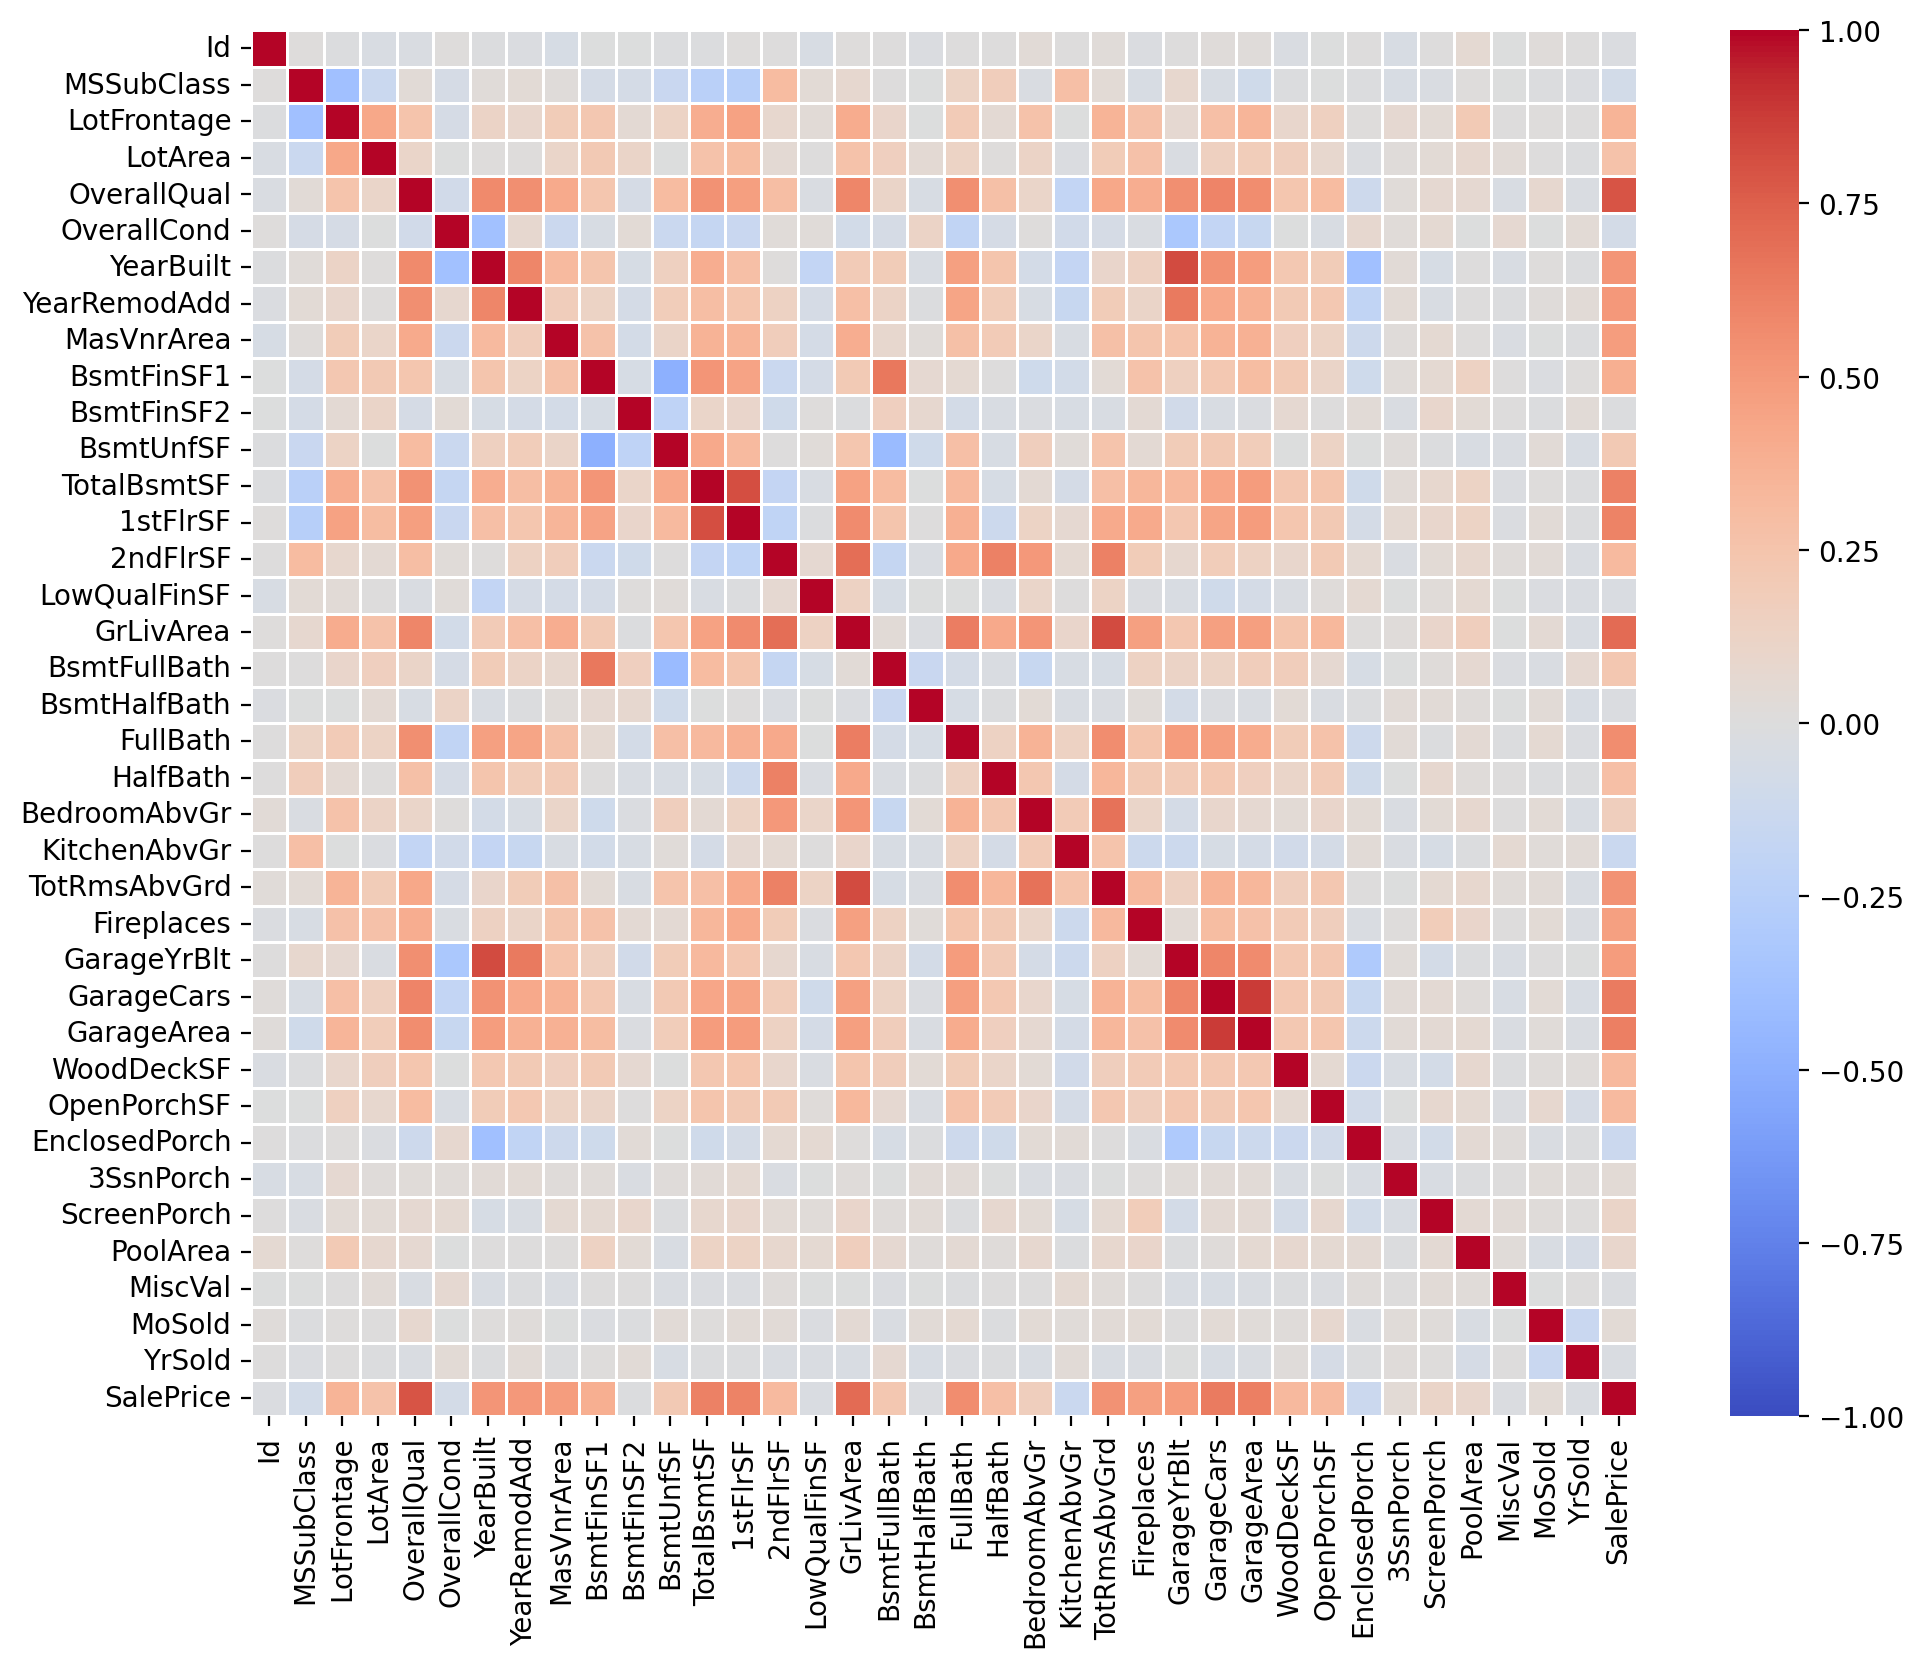

In [12]:
# Now we can plot the correlation matrix

corrmat = numeric_train.corr()  # Compute the correlation matrix for the training set
f, ax = plt.subplots(figsize=(12, 9))  # Create a figure and axis object with specified size

sns.heatmap(
    corrmat, 
    cmap="coolwarm",        # blue = negative, red = positive
    vmin=-1, vmax=1,        # force scale to -1...1
    center=0,               # make 0 the neutral midpoint
    square=True, 
    linewidths=0.5, 
    annot=False             # set to True if you want numbers on the cells
)

This heatmap is a great way to get a quick overview of our 'plasma soup':

- Each square shows the correlations between two variables in the dataset
- The variables are listed on both the x-axis and the y-axis, so the plot is **symmetric**
- The color of each cell tells us the strength and direction of the correlation:
    - Darker colours indicate stronger correlation
    - Brighter colours indicate a weaker correlation
- The diagonal is always 1.0, because a variable always correlates perfectly with itself
- It is important to **use this to spot multicollinearity** (e.g. variables that are highly correlated with eachother, lik GarageCars and GarageArea)


Findings:
- TotalsmtSF and 1stFlrSF are strongly correlated
- GarageX variables are strongly correlated
- Strong correlation between 'SalePrice' and GrLivArea, Total BsmtSF, and OverallQual


Now, lets move on to make a more focused correllation heatmap, showing only the TEN variables most correlated to SalePrice

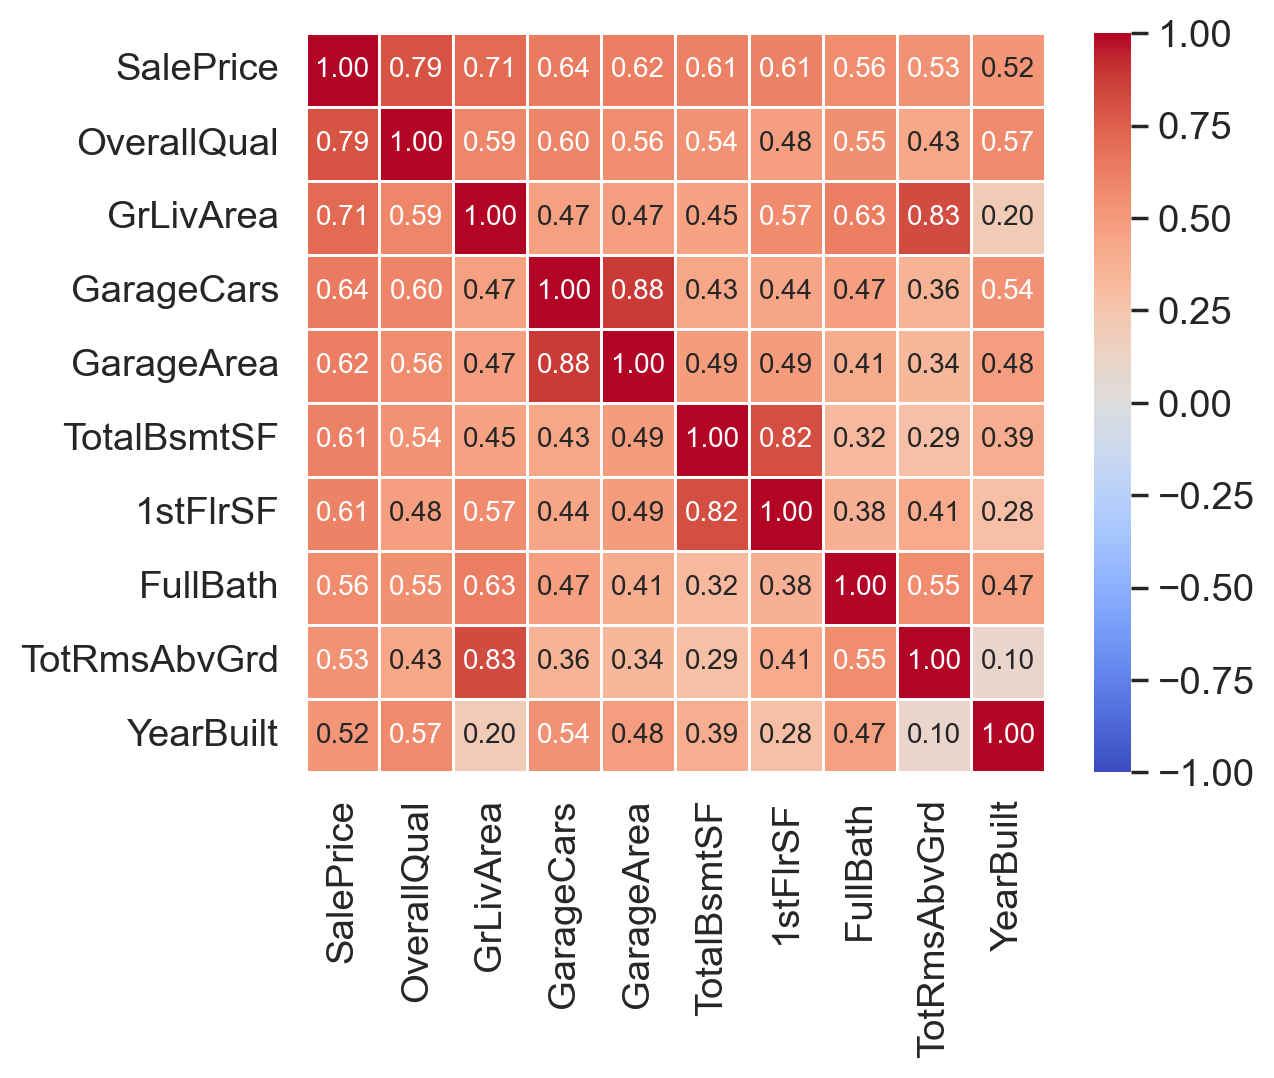

In [13]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index # Get the names of the k features most correlated with SalePrice
cm = np.corrcoef(numeric_train[cols].values.T) # Compute the correlation matrix for the selected columns
sns.set_theme(font_scale=1.25) # Set the font scale for the heatmap
hm = sns.heatmap(
    cm,         # The correlation matrix
    cbar=True,  # Show the color bar
    annot=True, # Annotate the cells with the correlation values
    square=True,# Make the cells square
    fmt='.2f',  # Format the annotation to 2 decimal places
    annot_kws={'size': 10}, # Set the annotation font size
    yticklabels=cols.values, # Set the y-axis tick labels to the column names
    xticklabels=cols.values,  # Set the x-axis tick labels to the column names
    cmap="coolwarm",   # diverging scheme
    vmin=-1, vmax=1,   # fix scale from -1 to 1
    center=0,          # put 0 in the middle
    linewidths=0.5     # add lines between cells
)
plt.show()

Great! Some interesting takeaways:

- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice
- 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. We only need one of them, because they pretty much tell us the same thing. We can keep GarageCars, because its correlation with SalePrice is higher
- 'TotRmsAbvGrd' and 'GrLivArea' are also 'sister' variables

Now, lets make scatter plots to show all of these relationships. **This is a very very good graph to use**

/Users/arikatz/VSCode Projects/house-prices-ml/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


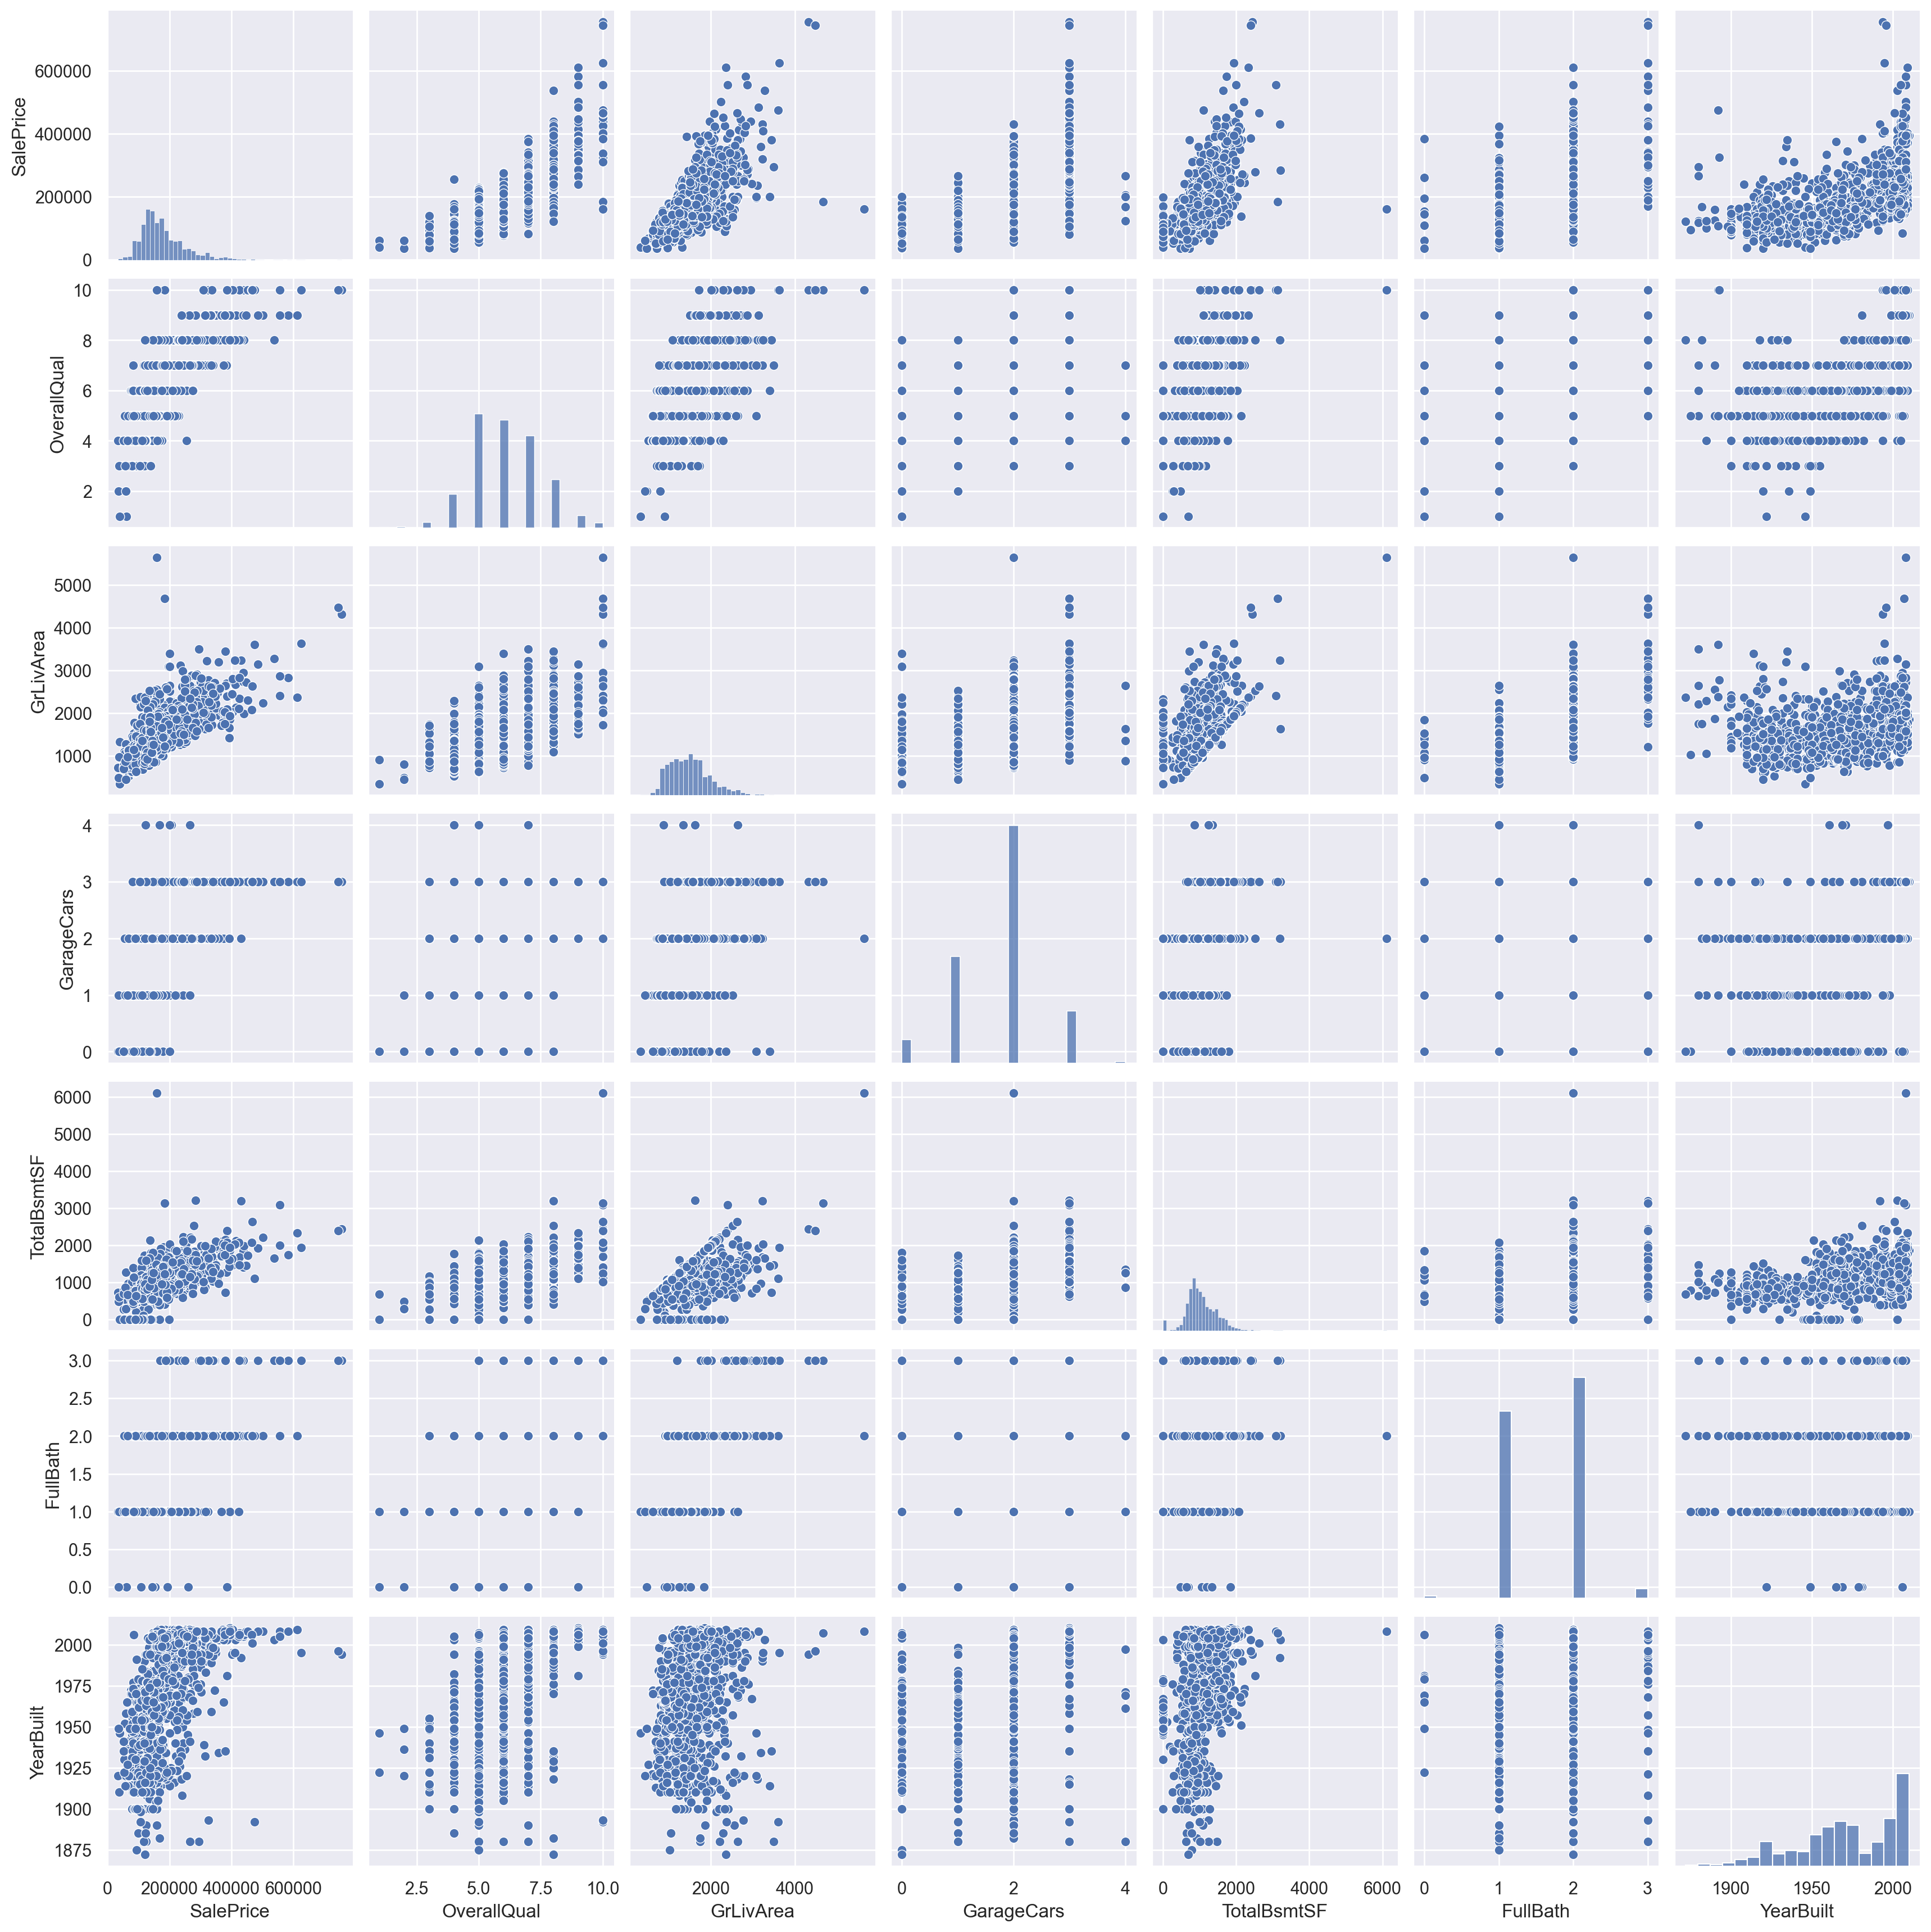

In [14]:
#scatterplot
sns.set_theme() # Reset the theme to default
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt'] # List of columns to plot
sns.pairplot(train[cols], size = 2.5, diag_kind="hist")  # Create a pairplot of the selected columns with a specified size
plt.show(); # Display the plot

In the above:
- Each row/column corresponds to one variable.
- Off-diagonal cells show scatterplots between two variables.
- **Diagonal cells show a histogram of that variable itself**


# Section 2: Dealing with Missing Data

**Note: There are more techniques to deal with missing data, such as using algorithms to predict the missing values. However, these are more complex and out of scope for this notebook**

In [15]:
# Print training set shape
print("Training set shape:", train.shape)  # Print the shape of the training set
print("Test set shape:", test.shape)        # Print the shape of the test set

Training set shape: (1460, 81)
Test set shape: (1459, 80)


In [16]:
# missing data
total = train.isnull().sum().sort_values(ascending=False)  # Calculate the total number of missing values for each column and sort in descending order
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending=False)  # Calculate the percentage of missing values for each column and sort in descending order
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # Concatenate the total and percent Series into a new DataFrame

missing_data.head(30)  # Display the top 30 rows of the missing data DataFrame


,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945


Now, lets analyse our findings above:

- Firstly, lets say that when more than 15% of data is missing, we should delete the corresponding variable and pretend it never existed
- This means that all variables from PoolQC to LotFrontage are GONE
- Also, the GarageX variables are each missing ~5% of observations. We know that the most important information regarding Garages is expressed by GarageCars (see heatmap), so we can delete the mentioned GarageX variables. Same logic applies to BsmtX
- Delete MasVnrArea because it has a strong correlation with yearBuilt and OverallQual, which are already considered. Thus, we will NOT loose information if we delete
- Finally, we have just one observation missing in 'Electrical'. Since it is just one observation, we can delete the observation and **keep the variable**


In [17]:
### Dealing with Missing Data

# Finding the dropped columns
dropped_cols = missing_data[missing_data['Total'] > 1].index.tolist()  # List of columns with more than 1 missing value
print("Columns to be dropped (more than 1 missing value in training set):")
for col in dropped_cols:
    print("-", col)


train = train.drop(dropped_cols, axis=1) # Drop columns with more than 1 missing value

train = train.drop(train.loc[train['Electrical'].isnull()].index) # Drop rows where 'Electrical' is missing

train.isnull().sum().max() #just checking that there's no missing data missing...

# Dropping the same columns from the test set
test = test.drop(dropped_cols, axis=1) # Drop the same columns from the test set

# Print training set shape
print("\nTraining set shape:", train.shape)  # Print the shape of the training set

# Print test set shape
print("Test set shape:", test.shape)        # Print the shape of the test set

Columns to be dropped (more than 1 missing value in training set):
- PoolQC
- MiscFeature
- Alley
- Fence
- MasVnrType
- FireplaceQu
- LotFrontage
- GarageYrBlt
- GarageCond
- GarageType
- GarageFinish
- GarageQual
- BsmtFinType2
- BsmtExposure
- BsmtQual
- BsmtCond
- BsmtFinType1
- MasVnrArea

Training set shape: (1459, 63)
Test set shape: (1459, 62)


Great. As we can see we've dropped 18 columns, and 1 row.

Now, lets fill in missing values in the test set using training set averages/modes (this is the most basic way to deal with missing data):

In [18]:
# Fill in missing values in test set using training set averages/modes

# First, we need to find which columns have missing values in the test set
total = test.isnull().sum().sort_values(ascending=False)  # Calculate the total number of missing values for each column and sort in descending order

# Calculate the percentage of missing values for each column and sort in descending order
percent = (test.isnull().sum() / len(test)) * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # Concatenate the total and percent Series into a new DataFrame
missing_data.head(30)  # Display the top 15 rows of the missing data DataFrame

,Total,Percent
MSZoning,4,0.27416
Functional,2,0.13708
BsmtFullBath,2,0.13708
BsmtHalfBath,2,0.13708
Utilities,2,0.13708
BsmtUnfSF,1,0.06854
BsmtFinSF2,1,0.06854
Exterior2nd,1,0.06854
GarageCars,1,0.06854
GarageArea,1,0.06854


In [19]:
# Fill missing values in test set using training set statistics
# (mean for floats, mode for ints/dummies/others)

missing_cols = test.columns[test.isnull().any()].tolist()
fills = {}

for col in missing_cols:
    if pd.api.types.is_float_dtype(test[col]):
        # Use mean for floats
        fill_val = train[col].mean()
    else:
        # Use mode for ints/categoricals/dummies
        mode = train[col].mode()
        fill_val = mode.iloc[0] if not mode.empty else train[col].mean()
    
    # Apply fill
    test[col].fillna(fill_val, inplace=True)
    fills[col] = fill_val

# Report what was filled
print("Filled missing columns in test set:")
for c, v in fills.items():
    print(f"- {c}: {v}")

# Sanity check
print("\nRemaining missing values in test set (should be 0 for all):")
print(test.isnull().sum().sort_values(ascending=False))

Filled missing columns in test set:
- MSZoning: RL
- Utilities: AllPub
- Exterior1st: VinylSd
- Exterior2nd: VinylSd
- BsmtFinSF1: 443.943797121316
- BsmtFinSF2: 46.58122001370802
- BsmtUnfSF: 567.3660041124058
- TotalBsmtSF: 1057.8910212474298
- BsmtFullBath: 0.42563399588759426
- BsmtHalfBath: 0.05757368060315284
- KitchenQual: TA
- Functional: Typ
- GarageCars: 1.7669636737491432
- GarageArea: 473.0301576422207
- SaleType: WD

Remaining missing values in test set (should be 0 for all):
Id               0
Functional       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
                ..
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
SaleCondition    0
Length: 62, dtype: int64


/var/folders/gx/80ts4y7d7l70lm3l2x417_j00000gn/T/ipykernel_85090/1615860514.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[col].fillna(fill_val, inplace=True)


# Section 3: Outliers

- Outliers are something we should be aware of, because they can markedly affect our models
- We'll start off by generating scatter plots of some of our main variables

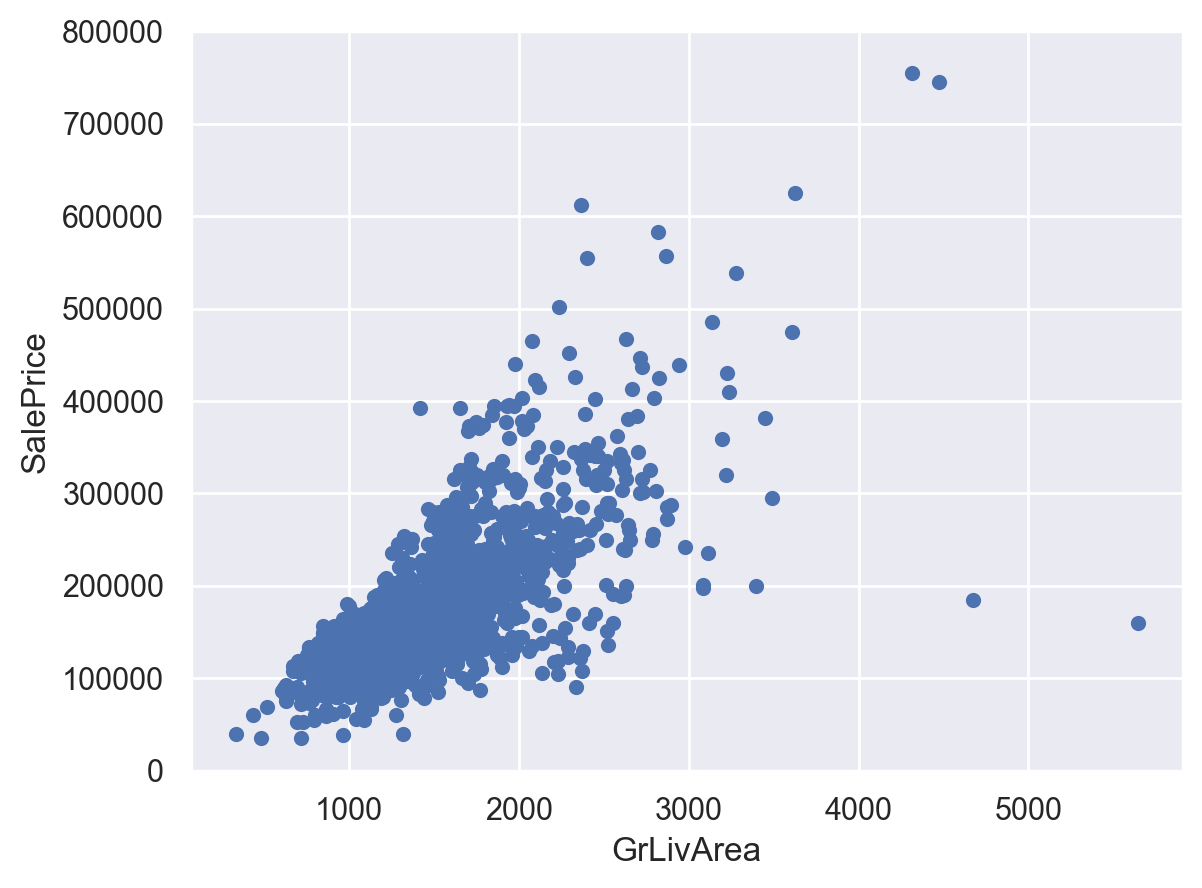

In [20]:
# bivariate analysis saleprice/grlivarea

data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)  # Concatenate the two columns into a new DataFrame. axis=1 means we are concatenating columns (not rows)    
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));   # Scatter plot with GrLivArea on the x-axis and SalePrice on the y-axis. ylim sets the y-axis limits

- It looks live the two observations in the bottom right are outliers. Maybe they refer to agricultural area and could explain the low price.
- The two observations in the top of the plot are special, but they seem to be following the trend so we'll leave them in

In [21]:
# Removing the two outliers in the bottom right corner
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

# Print training set shape
print("\nTraining set shape:", train.shape)  # Print the shape of the training set

# Print test set shape
print("Test set shape:", test.shape)        # Print the shape of the test set


Training set shape: (1457, 63)
Test set shape: (1459, 62)


Now, lets move on to OverallQual:

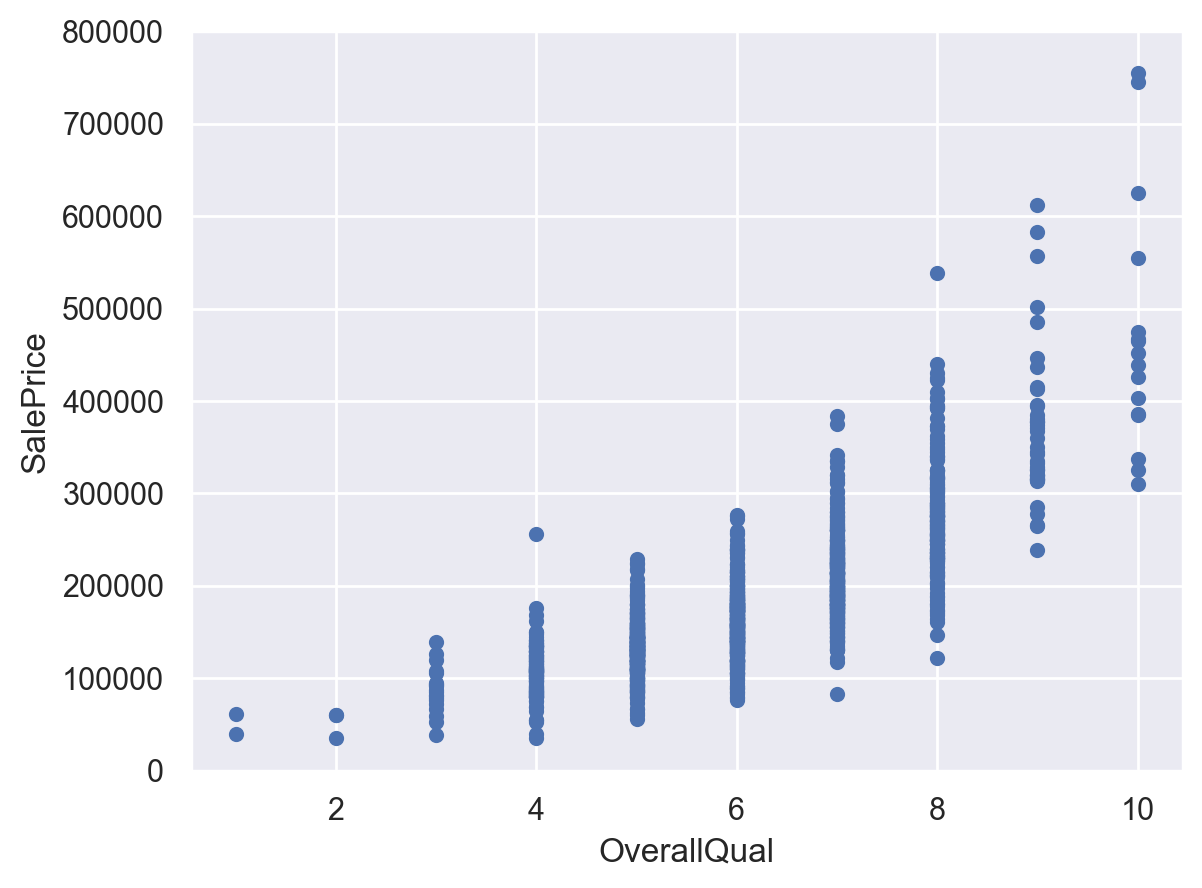

In [22]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)  # Concatenate the two columns into a new DataFrame. axis=1 means we are concatenating columns (not rows)
data.plot.scatter(x='OverallQual', y='SalePrice', ylim=(0,800000));   # Scatter plot with OverallQual on the x-axis and SalePrice on the y-axis. ylim sets the y-axis limits

No evident outliers. Could test more variables, but the intuitively no others would make sense to test here.

# Section 4: Testing for assumptions

According to Hair et al. (2013), four assumptions should be tested:

1. **Normality**- When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis. **Note, not all models assume normality. In fact, most ML models (e.g. random forests) don't assume normality.**

2.  **Homoscedasticity** - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

3.  **Linearity**- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

4. **Absence of correlated errors** - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.


Let's start off with normality. Here are some rules of thumb:

- Transform if: skewness is high, variance grows with the mean, or residuals look heteroscedastic.
- Leave as is if: distribution is already symmetric or variable is categorical/discrete.
- Mixing transformed and untransformed variables is completely fine — models can handle it.
- Remember, most ML models don't require normality


/var/folders/gx/80ts4y7d7l70lm3l2x417_j00000gn/T/ipykernel_85090/782787538.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], fit=norm);      ## Histogram of SalePrice with a kernel density estimate (KDE) overlay


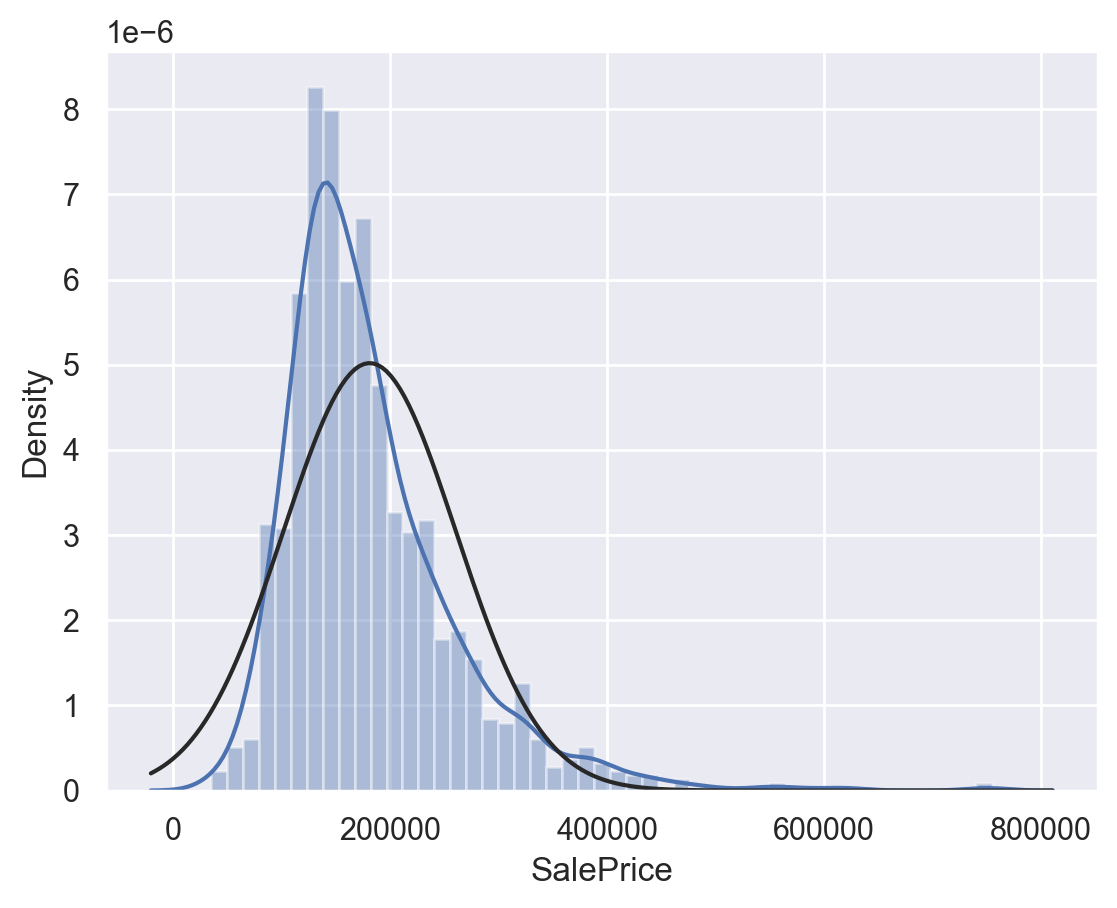

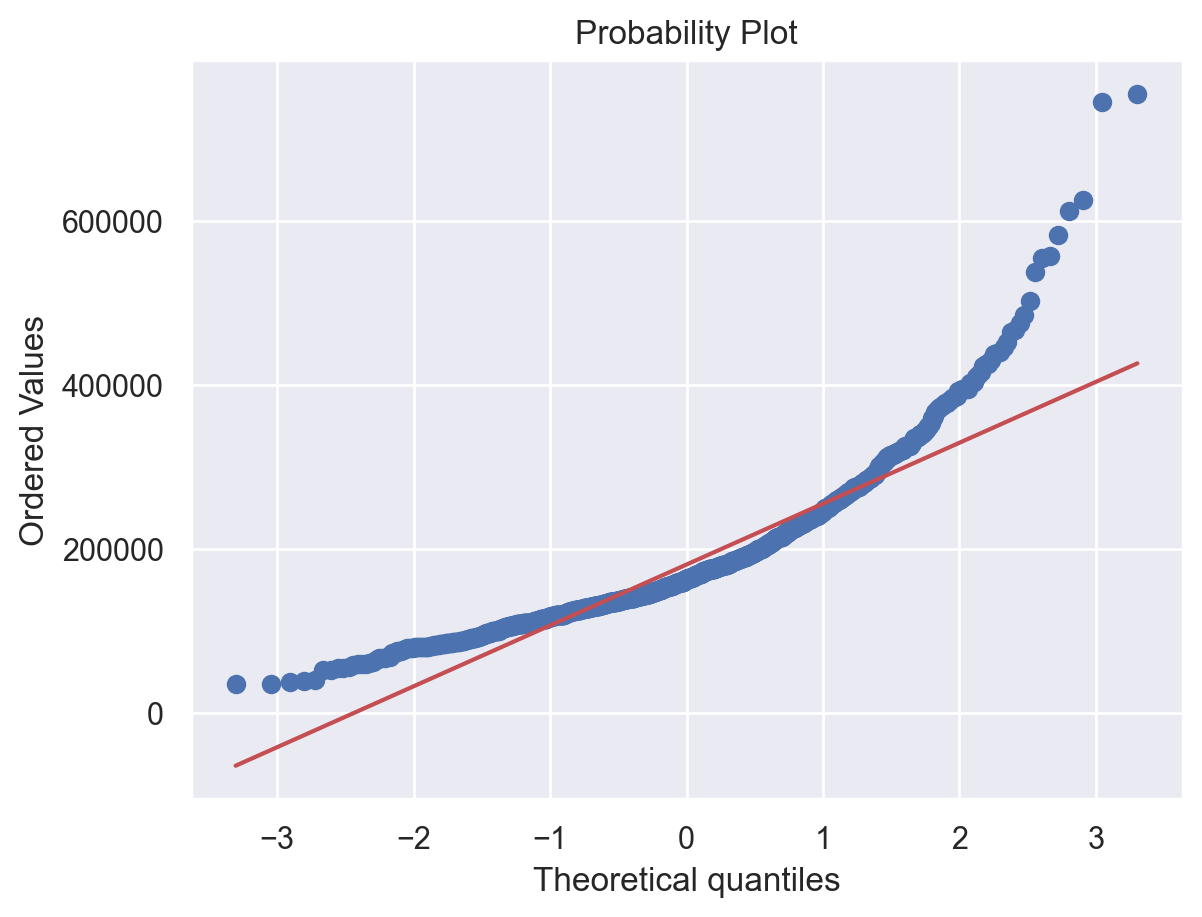

In [23]:
## Testing the normality of SalePrice after removing outliers
sns.distplot(train['SalePrice'], fit=norm);      ## Histogram of SalePrice with a kernel density estimate (KDE) overlay
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)        ## Q-Q plot to assess if SalePrice follows a normal distribution

Here, we can see that SalePrice is not normal. It shows positive skewness (values are clustered on the left ) --> most values of low/medium, but nsome extreme high values stretch the distribution to the right.

**In the case of positive skewness, log transformations usually work really well!** 

/var/folders/gx/80ts4y7d7l70lm3l2x417_j00000gn/T/ipykernel_85090/1166616326.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], fit=norm);      ## Histogram of SalePrice with a kernel density estimate (KDE) overlay


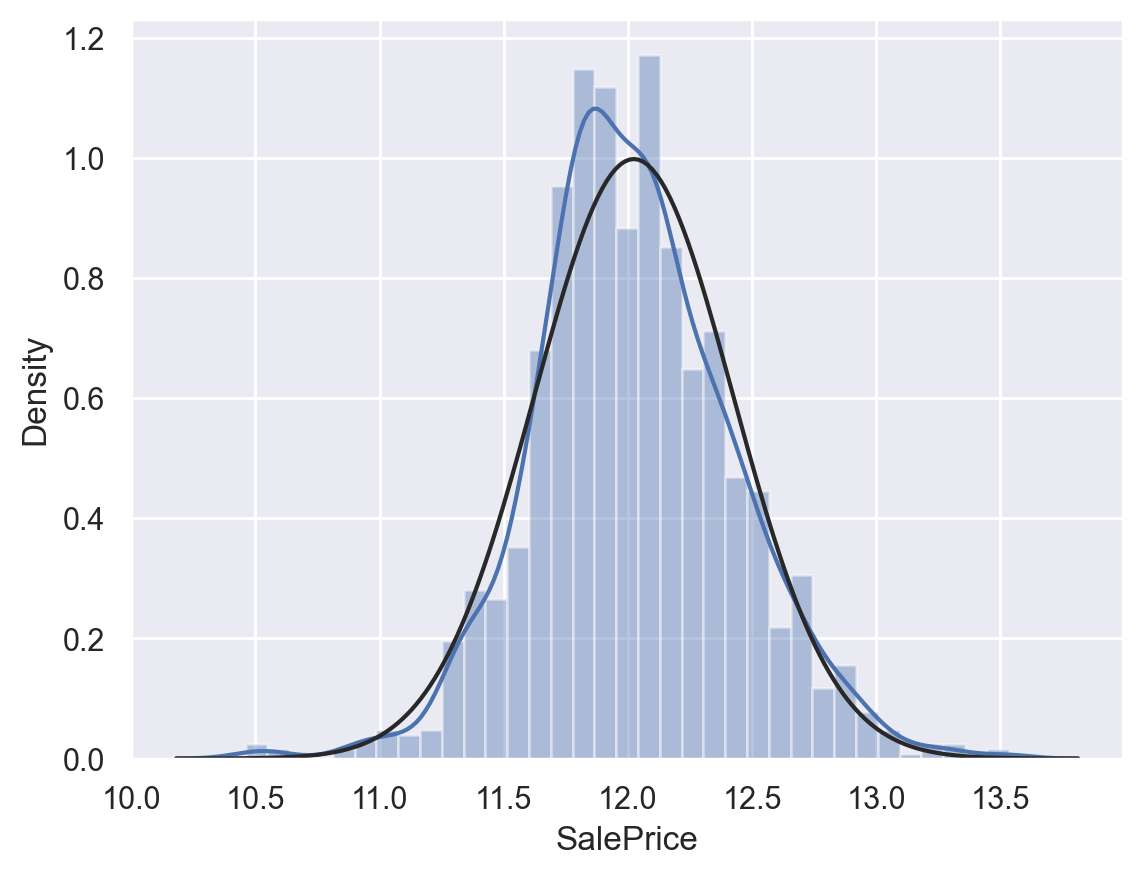

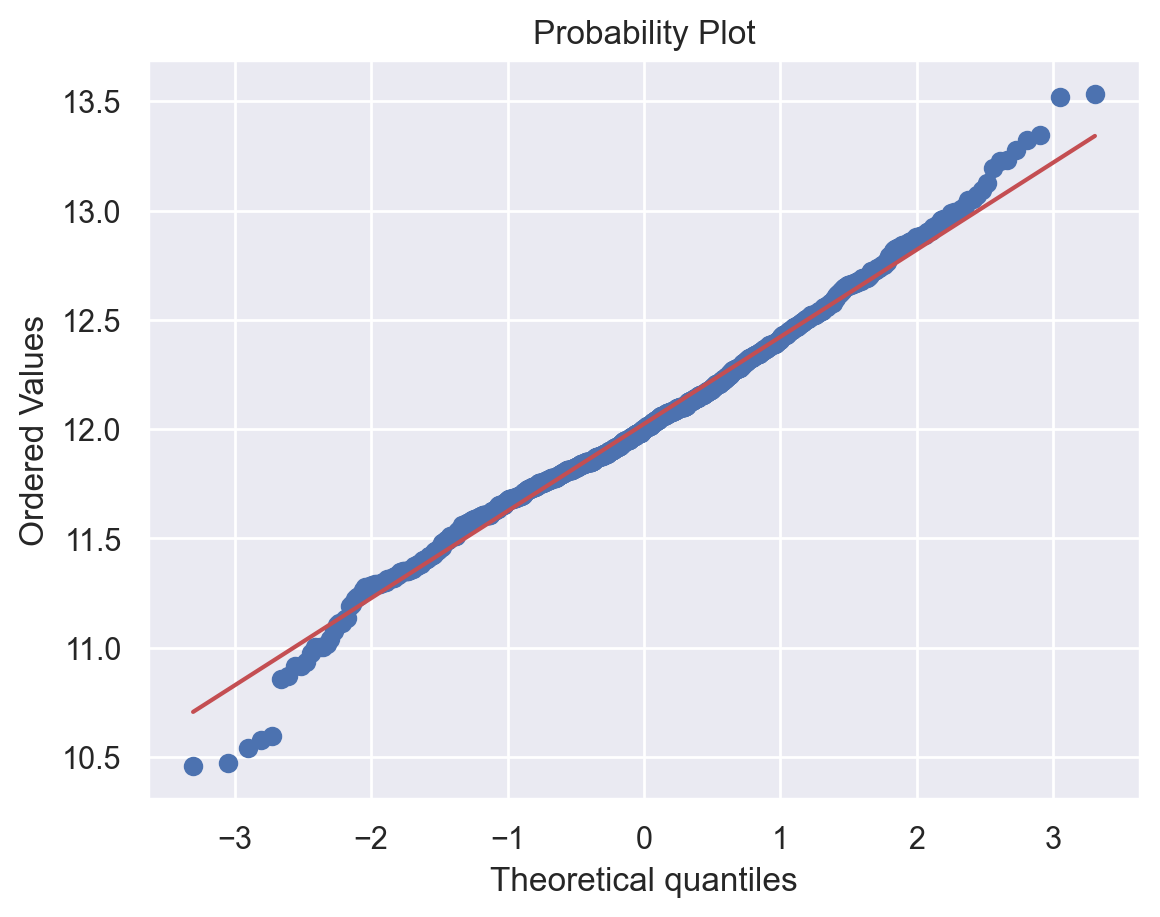

In [24]:
# applying log transformation to SalePrice
train['SalePrice'] = np.log(train['SalePrice'])
sns.distplot(train['SalePrice'], fit=norm);      ## Histogram of SalePrice with a kernel density estimate (KDE) overlay
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)        ## Q-Q plot to assess if SalePrice follows a normal distribution

In [25]:
train['SalePrice'].describe()
print("Skewness: %f" % train['SalePrice'].skew())  #    Print the skewness of SalePrice 

Skewness: 0.121551


Nice! That's looking better.

**Note: Y-axis of the histogram is density. This means that the total area under all bars = 1. Each bar represents the probability of data in that interval**

**Note: it is okay to not log-transform all variables. Only transform the variables that need it.** For now, we're not going to log-transform any other variables

**Note: we could probably do more work here to test homoscedasticity and linearity - but we'll save that for later.**

Now, lets  convert categorical variables into dummy

**Note: There will be cases where not ALL 'levels' of each 'feature' are present in the training set. To avoid this problem, we follow the following approach, remembering to be very careful because we don't want to contaminate our training data with our test data:**


In [26]:
print("Training set shape:", train.shape)  # Print the shape of the training set
print("Test set shape:", test.shape)        # Print the shape of the test set

Training set shape: (1457, 63)
Test set shape: (1459, 62)


In [27]:
# Concatenate train and test to ensure all dummy columns are created
train_rows = train.shape[0] # Number of rows in the training set
combined = pd.concat([train, test], sort=False) # Concatenate train and test sets along rows (sort=False to avoid sorting columns alphabetically)

# Create dummies for all categorical features
combined = pd.get_dummies(combined) # Convert categorical variables to dummy/indicator variables

# Split back into train and test
train = combined.iloc[:train_rows].copy() # Training set is the first 'train_rows' rows of the combined DataFrame (iloc is used for integer-location based indexing)
test = combined.iloc[train_rows:].copy() # Test set is the remaining rows of the combined DataFrame (iloc is used for integer-location based indexing)

print("Training set shape:", train.shape)  # Print the shape of the training set
print("Test set shape:", test.shape)        # Print the shape of the test set

Training set shape: (1457, 221)
Test set shape: (1459, 221)


Great. This is all looking good! 

**Note: During the concatenation of train and test sets, the column SalePrice was filled with NaNs in the test set. We will need to drop this column before making predictions.**


In [28]:
# Drop 'SalePrice' from the test set as it was filled with NaNs during concatenation
test = test.drop(['SalePrice'], axis=1) # Drop the 'SalePrice' column from the test set


print("Training set shape:", train.shape)  # Print the shape of the training set
print("Test set shape:", test.shape)        # Print the shape of the test set


Training set shape: (1457, 221)
Test set shape: (1459, 220)


The 'SalePrice' column is now in the middle of the training set, because all dummy variables were added after it. Lets move it to the end for clarity.

In [29]:
# Move SalePrice to the end of the training set dataframe
saleprice = train.pop('SalePrice')  # Remove 'SalePrice' from the training set and store it in a separate variable
train['SalePrice'] = saleprice      # Add 'SalePrice' back to the end of the training set

# Print training set shape
print("Training set shape:", train.shape)  # Print the shape of the training set

display(train.head(3))  # Display the first 3 rows of the training set

Training set shape: (1457, 221)


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,60,8450,7,5,2003,2003,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2.0,548.0,0,61,0,0,0,0,0,2,2008,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,Fal

Perfect. Now, we can describe our clean data:

In [30]:
print("Rows:", train.shape[0])
print("Columns:", train.shape[1])

missing = train.isnull().sum().sum() #just checking that there's no missing data missing...
print("Missing values:", missing)

# Find columns with missing values
missing_cols = train.columns[train.isnull().any()]
print("Columns with missing values:", list(missing_cols))

# Show how many missing values per column
print(train[missing_cols].isnull().sum())

Rows: 1457
Columns: 221
Missing values: 0
Columns with missing values: []
Series([], dtype: float64)


Perfect. We have 3 less rows than we started with, because we deleted the row with the missing 'electrical' variable, and the two outliers with high GrLivArea and low SalePrice

Next, lets convert all boolean columns to int8 (0 and 1):

In [31]:
# Convert boolean columns to int8 (0 and 1) for training set
bool_cols = train.select_dtypes(include=['bool', 'boolean']).columns  # Identify boolean columns
train[bool_cols] = train[bool_cols].astype('int8') # Convert boolean columns to integers (0 and 1)

# Convert boolean columns to int8 (0 and 1) for test set
bool_cols = test.select_dtypes(include=['bool', 'boolean']).columns  # Identify boolean columns
test[bool_cols] = test[bool_cols].astype('int8') # Convert boolean columns to integers (0 and 1)


Finally, lets add a 'constant' column to our dataframes, so that statsmodels can calculate the intercept:

In [32]:
# Add intercept to training set
train = sm.add_constant(train, has_constant='add')

# Add intercept to test set
test = sm.add_constant(test, has_constant='add')

# Rearrange columns so that ID is the first column and SalePrice is the last column
cols = train.columns.tolist()  # Get the list of columns in the training set
cols.insert(0, cols.pop(cols.index('Id')))  # Move 'Id' to the front
cols.append(cols.pop(cols.index('SalePrice')))  # Move 'SalePrice' to the end
train = train[cols]  # Reorder the training set columns

# Now do the same with the test set (without SalePrice)
cols = test.columns.tolist()  # Get the list of columns in the test set
cols.insert(0, cols.pop(cols.index('Id')))  # Move 'Id' to the front
test = test[cols]  # Reorder the test set columns


display(train.head(3))
print("Training set shape:", train.shape)  # Print the shape of the training set

display(test.head(3))
print("Test set shape:", test.shape)        # Print the shape of the test set



,Id,const,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,1.0,60,8450,7,5,2003,2003,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,12.2476

Training set shape: (1457, 222)


,Id,const,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,1.0,20,11622,5,6,1961,1961,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,6,2010,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1462,1.0,

Test set shape: (1459, 221)


Great. We have no successfully explored and preprocessed our training data. Before moving on to modelling, we need to ensure that the test set is also preprocessed in the same way, and that there are no missing values in the test data

# Fixing up the test set
1. Ensure all columns in test set are also in train set (and in the same order)
2. Check that there are no missing values in the test set

Lets start off by visualising the columns in each dataframe:

In [33]:
display(train.head(3))
print("Rows:", train.shape[0])
print("Columns:", train.shape[1])

,Id,const,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,1.0,60,8450,7,5,2003,2003,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,12.2476

Rows: 1457
Columns: 222


In [34]:
display(test.head(3))
print("Rows:", test.shape[0])
print("Columns:", test.shape[1])

,Id,const,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,1.0,20,11622,5,6,1961,1961,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,6,2010,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1462,1.0,

Rows: 1459
Columns: 221


In [35]:
# Test for missing values in test set

# missing data
total = test.isnull().sum().sort_values(ascending=False)  # Calculate the total number of missing values for each column and sort in descending order
percent = (test.isnull().sum()/test.isnull().count()*100).sort_values(ascending=False)  # Calculate the percentage of missing values for each column and sort in descending order
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # Concatenate the total and percent Series into a new DataFrame

missing_data.head(10)  # Display the top 30 rows of the missing data DataFrame

,Total,Percent
Id,0,0.0
Exterior2nd_Other,0,0.0
Exterior1st_Wd Sdng,0,0.0
Exterior1st_WdShing,0,0.0
Exterior2nd_AsbShng,0,0.0
Exterior2nd_AsphShn,0,0.0
Exterior2nd_Brk Cmn,0,0.0
Exterior2nd_BrkFace,0,0.0
Exterior2nd_CBlock,0,0.0
Exterior2nd_CmentBd,0,0.0


### Now, we can export the clean data, and start using it for analysis! Make sure to **change the name of the file** if I don't want to overwrite it.

In [36]:
# Ensure the directory exists before saving
Path("data/processed").mkdir(parents=True, exist_ok=True) # Create the directory if it doesn't exist 
output_path = Path("..") / "data" / "processed" / "train_clean.csv"     # Define the output path for the cleaned training data
train.to_csv(output_path, index=False)

In [37]:
Path("data/processed").mkdir(parents=True, exist_ok=True) # Create the directory if it doesn't exist 
output_path = Path("..") / "data" / "processed" / "test_clean.csv"     # Define the output path for the cleaned test data
test.to_csv(output_path, index=False)